## **Author Name: Rizon Kumar Rahi**


## **Organisation : The Sparks Foundation**

##  Task - 1 : Prediction using Supervised ML 
Predict the percentage of marks of an student based on the number of study hours.

## STEP 1 - Importing the Libaries & dataset 

In [1]:
# Importing all libraries required in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Reading data from remote link
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## STEP 2 - Visualizing the dataset

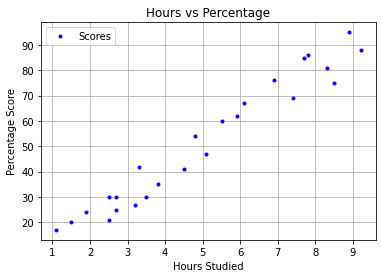

In [4]:
df.plot(x='Hours', y='Scores', style='.', color='blue')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

In [5]:
# we can also use .corr to determine the corelation between the variables 
df.corr()


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## STEP 3 - Data preparation & Splitting the dataset

In [6]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [28]:
# using iloc function we will divide the data 
X = df.iloc[:, :1].values  
y = df.iloc[:, 1:].values

In [29]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [30]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [41]:
# Splitting data into training and testing data

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

## STEP 4 - Training the Algorithm
We have splited our data into training and testing sets, and now we will train our Model.

In [42]:
from sklearn.linear_model import LinearRegression  

l = LinearRegression()  
l.fit(X_train, y_train)

LinearRegression()

 Try to divide the data in array or else you will get Expected 2D array, got 1D array instead.

In [43]:
#To print coefficient and intercepts model
l.coef_

array([[9.91065648]])

In [44]:
l.intercept_

array([2.01816004])

## STEP 5 - Visualizing the model
After training the model, now its time to visualize it

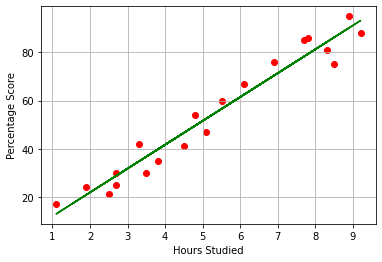

In [46]:
# Plotting the regression line
line = l.coef_*X+l.intercept_

# Plotting for the test data
plt.show()
plt.scatter(X_train, y_train, color='red')
plt.plot(X, line, color='green');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

## STEP 6 - Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [47]:
print(X_test)
y_pred = l.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [54]:
#Comparing actual and predicated values of a dataframes
comp = pd.DataFrame({ 'Actual':[y_test],'Predicted':[y_pred] })
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [61]:
# You can also test with your own data
hours = 9.25
own_pred = l.predict([[hours]])
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Number of Hours = 9.25
Predicted Score = [93.69173249]


## STEP 7 - Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [62]:
from sklearn import metrics  

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
